Octubre 2024

# Especialización en Inteligencia Artificial, Universidad Minuto de Dios
## Fundamentos para IA NRC-405
Jose Guillermo Valle Pavas

Actividad Semana 4 - **Uso de librerías Python para IA**
___

### **Importacion y analisis de los datos:**

In [43]:
# importamos las librerias que vamos ausar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# cargar Data
path = 'https://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.tab.txt'
# se importa como csv, pero se especifica que esta separado por tabs
data = pd.read_csv(path, sep='\t')
print(data)

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]


In [45]:
# mostramos el head del data set
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


### **Limpieza de datos:**

In [47]:
# modificamos todos los valores para qie sean numericos, pasamos los float64 a int64
data = data.astype({'BMI': 'int64', 'BP': 'int64', 'S2': 'int64','S2': 'int64', 'S3': 'int64', 'S4': 'int64', 'S5': 'int64' })
data.dtypes

,0
AGE,int64
SEX,int64
BMI,int64
BP,int64
S1,int64
S2,int64
S3,int64
S4,int64
S5,int64
S6,int64


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AGE     442 non-null    int64
 1   SEX     442 non-null    int64
 2   BMI     442 non-null    int64
 3   BP      442 non-null    int64
 4   S1      442 non-null    int64
 5   S2      442 non-null    int64
 6   S3      442 non-null    int64
 7   S4      442 non-null    int64
 8   S5      442 non-null    int64
 9   S6      442 non-null    int64
 10  Y       442 non-null    int64
dtypes: int64(11)
memory usage: 38.1 KB


In [49]:
# validamos si tenemos valotres nulos
data.isnull().sum()

,0
AGE,0
SEX,0
BMI,0
BP,0
S1,0
S2,0
S3,0
S4,0
S5,0
S6,0


In [50]:
# validamos si tenemos valores duplicados y los tratamos
nRow1, nCol1 = data.shape
duplicados = data.duplicated().sum()
porcentaje = round ((duplicados * 100)/nRow1, 2)
print(f'El numero de duplicados es: {duplicados} que equivale a un {porcentaje}')
if porcentaje != 0:
    if porcentaje < 1:
        print(f'Se eliminaran los registros duplicados')
        print(f'Tamaño ANTES de eliminar la duplicadas: {data.shape}')
        data.drop_duplicates(inplace=True)
        print(f'Tamaño DESPUES de eliminar la duplicadas: {data.shape}')
    else :
        print(f'No se eliminaron registros, por que el porcenaje es igual o mayor a 1')
else :
    print(f'No se eliminaron registros, por que no hay duplicados')

El numero de duplicados es: 0 que equivale a un 0.0
No se eliminaron registros, por que no hay duplicados


In [51]:
# identificamos las variables finales que tenemos, numéricas y categóricas
variables_numericas = [col for col in data.columns if data[col].dtype != object]
variables_categoricas = [col for col in data.columns if data[col].dtype == object]
print(f'Variables numericas: {variables_numericas}')
print(f'Variables Categoricas: {variables_categoricas}')

Variables numericas: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']
Variables Categoricas: []


### **Analisis grafico de los datos:**

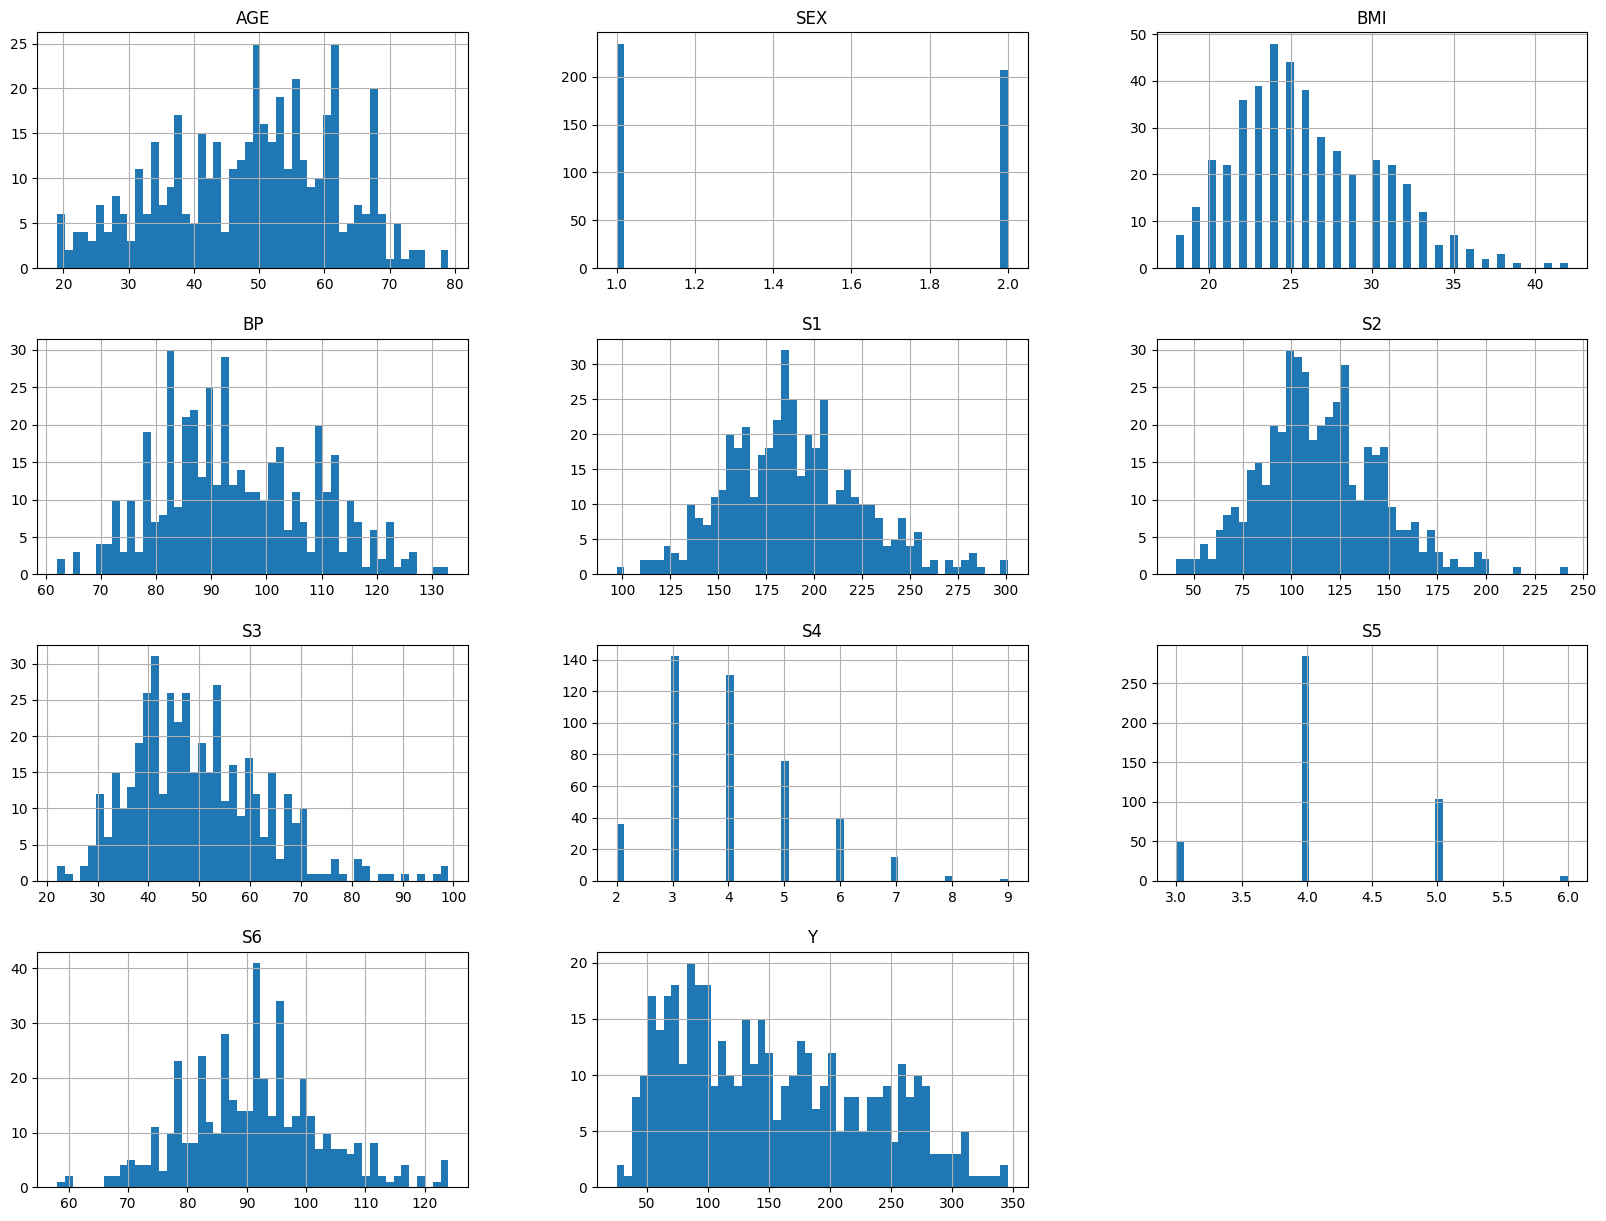

In [52]:
# generamos un histograma por cada columna para realizar una lectura del comportamiento de todos los datos
# y evidenciar las posibles agupaciones de los datos
data.hist(bins=50, figsize=(20,15))
plt.show()

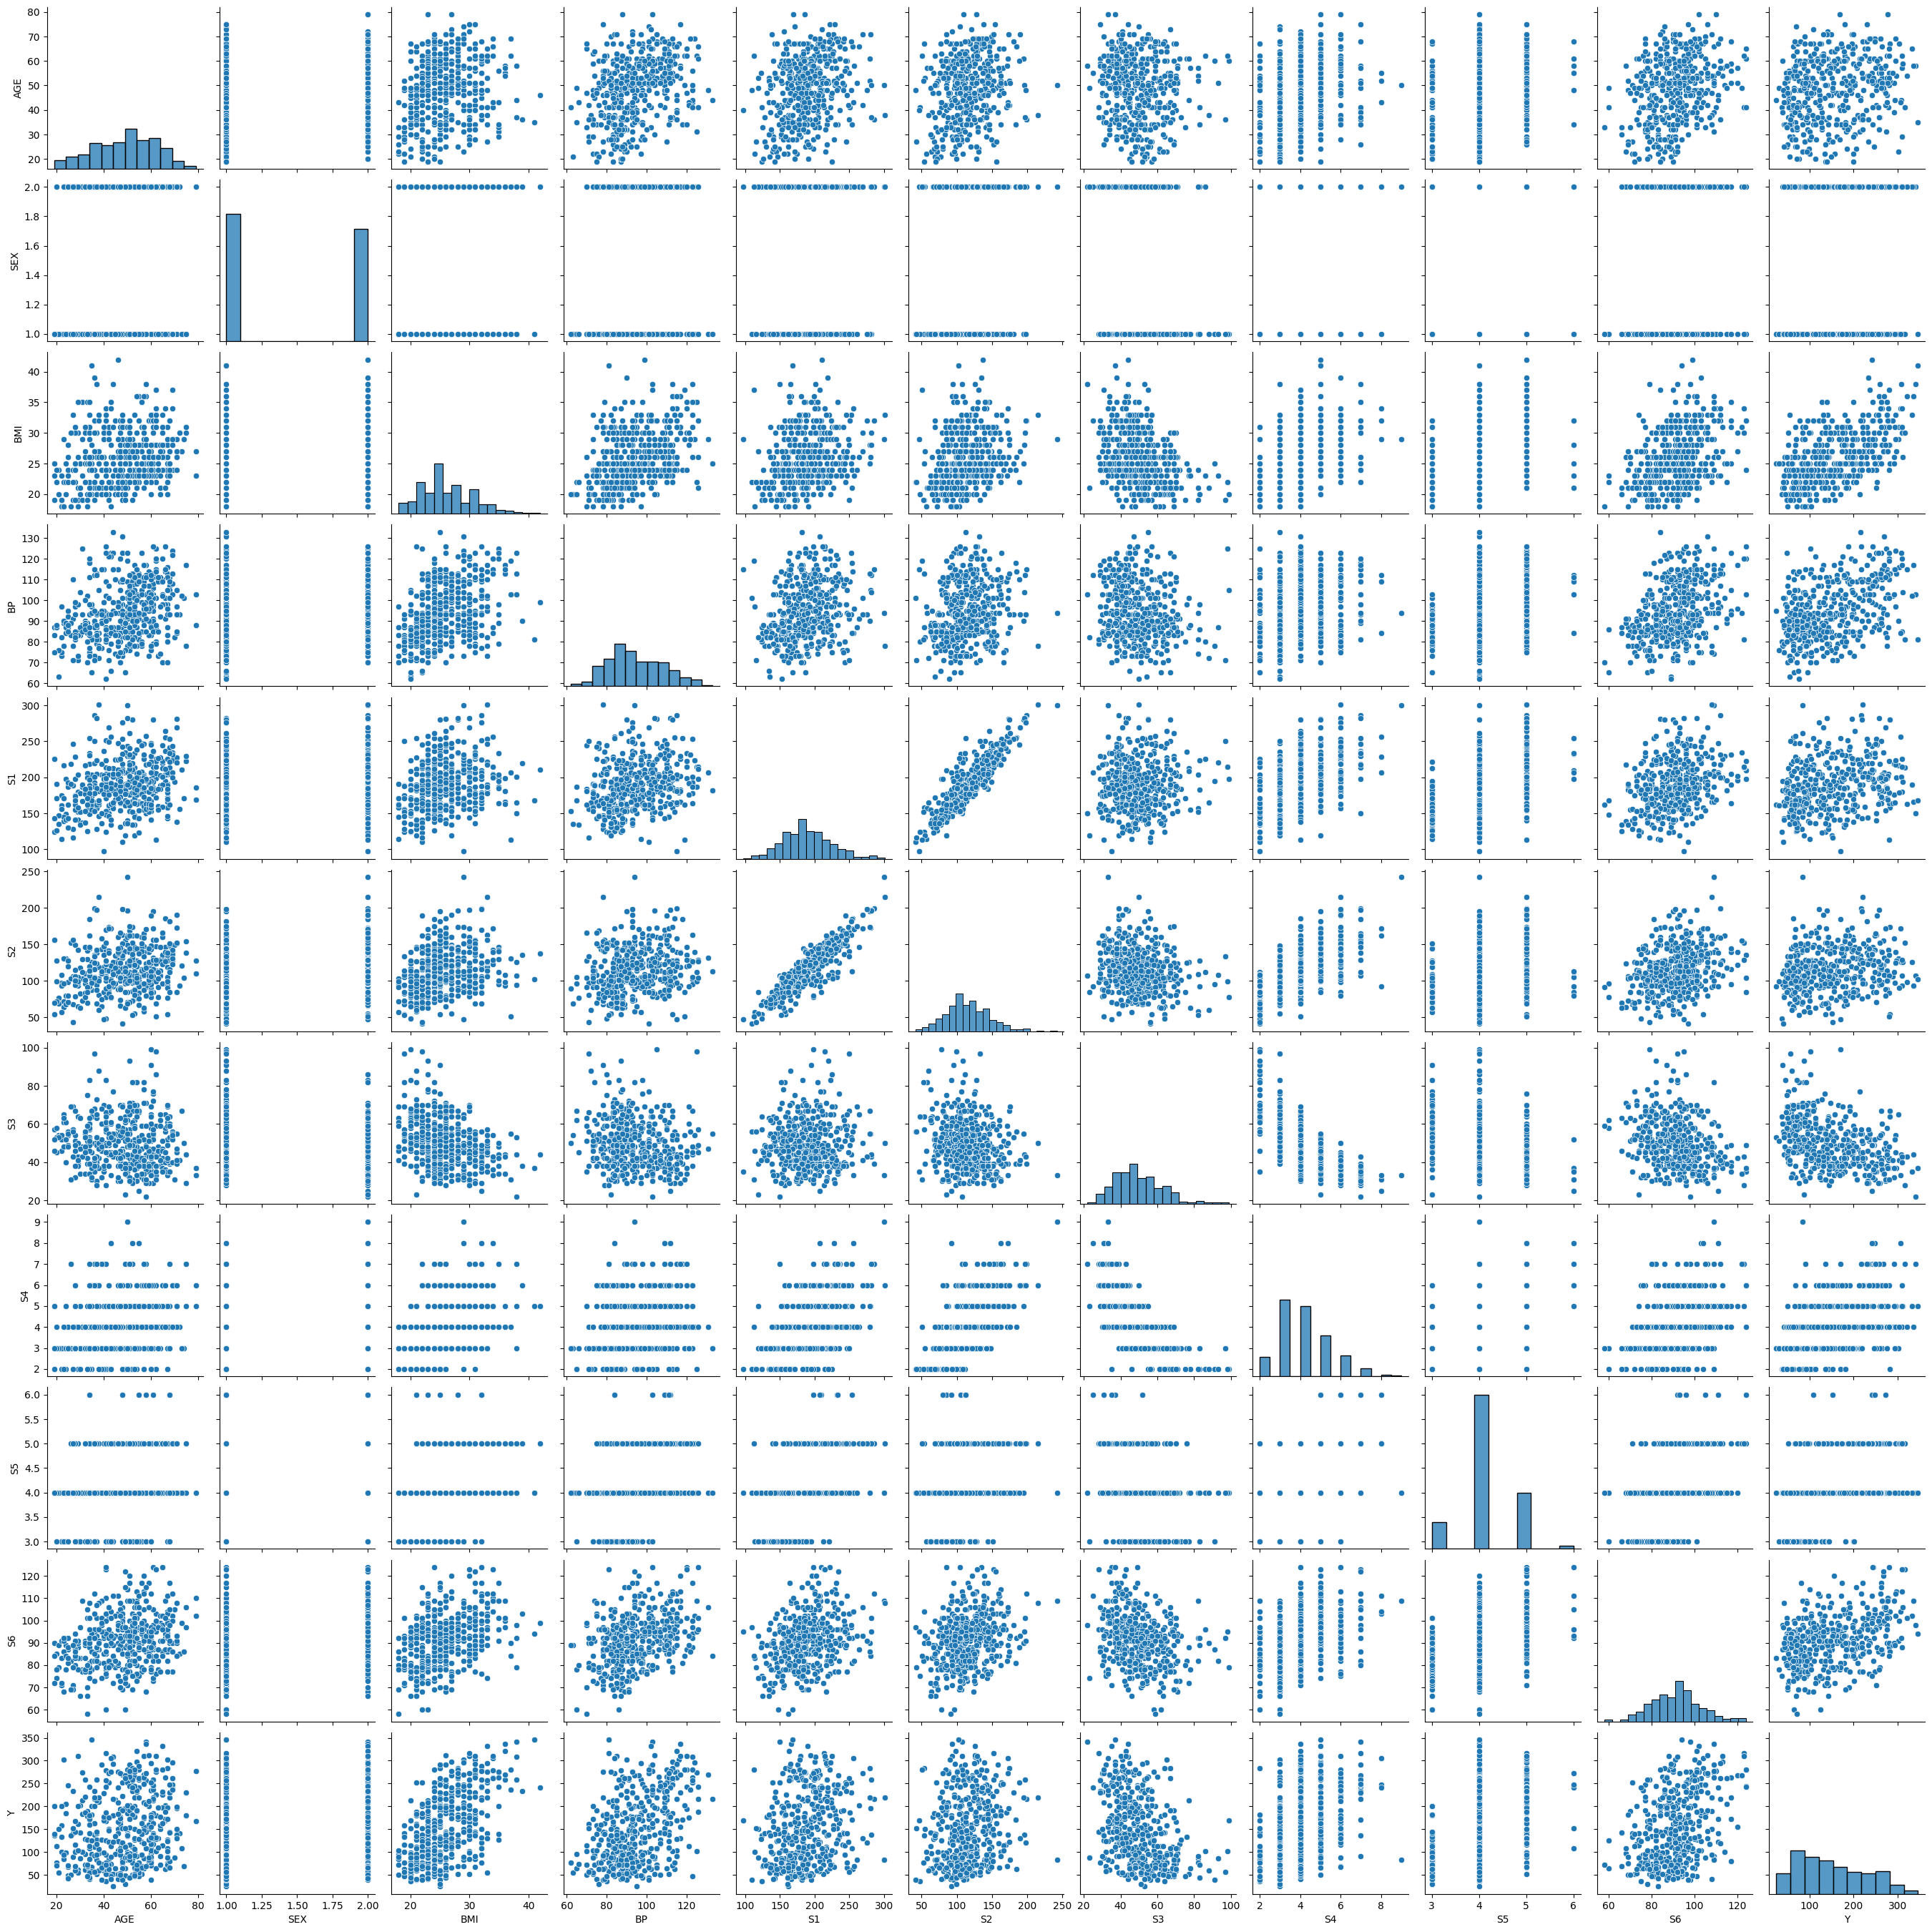

In [53]:
# realizamos un scatter plot para estudiar los valores de los datos
# estos graficos nos ayuda estudiar el comportamiento de de los datos de cada una de las columnas
# con sus relaciones y posibles agrupaciones, relaciones o patrones entre todos los datos
sns.pairplot(data)
plt.show();

In [54]:
# validamos los sub nivels, este tambien nos ayuda a validar el nuemro de datos seleccionables que tiene cada columna
cols_cat = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna AGE: 58 subniveles
Columna SEX: 2 subniveles
Columna BMI: 24 subniveles
Columna BP: 63 subniveles
Columna S1: 141 subniveles
Columna S2: 128 subniveles
Columna S3: 62 subniveles
Columna S4: 8 subniveles
Columna S5: 4 subniveles
Columna S6: 56 subniveles


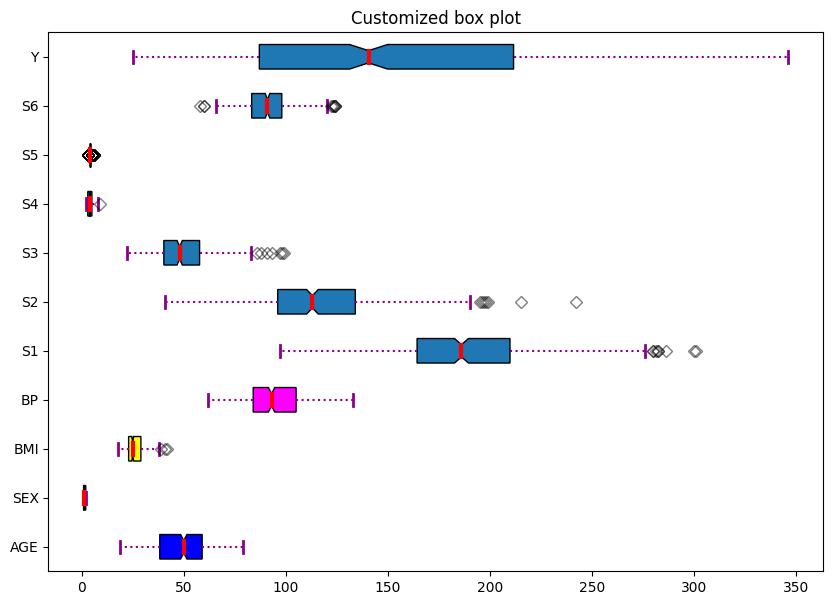

In [55]:
# creamos un boxplot para visualizar los valores atipicos en cada una de las variables
# identificamos los valores atipicos
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# cambiar el color y el ancho de línea de
# bigotes
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# cambiar el color y el ancho de línea de
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# cambiar el color y el ancho de línea de
# medianas
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

#cambiar el estilo de los volantes
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# etiquetas x-axis
ax.set_yticklabels(data)

# adicionar titulo
plt.title("Customized box plot")

# Eliminación de los ejes superiores y derechos
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# mostrar el grafico plot
plt.show()

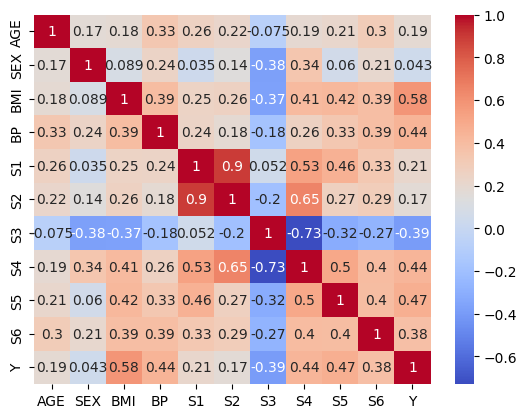

In [56]:
# realizamos la correlacion para identificar los datos que estan corelacionados
data.corr()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

### **Calculo de las medidas estadísticas:**

In [57]:
# calculamos la media y la varianza la desviacion estandar de todo el data set
print(f'Media: {data.mean()}')
print(f'Varianza: {data.var()}')
print(f'Desviacion Estandar: {data.std()}')


Media: AGE     48.518100
SEX      1.468326
BMI     25.957014
BP      94.601810
S1     189.140271
S2     115.052036
S3      49.787330
S4       4.004525
S5       4.149321
S6      91.260181
Y      152.133484
dtype: float64
Varianza: AGE     171.846610
SEX       0.249561
BMI      19.723772
BP      191.355824
S1     1197.717241
S2      924.675291
S3      167.310678
S4        1.646238
S5        0.376746
S6      132.165712
Y      5943.331348
dtype: float64
Desviacion Estandar: AGE    13.109028
SEX     0.499561
BMI     4.441145
BP     13.833142
S1     34.608052
S2     30.408474
S3     12.934863
S4      1.283058
S5      0.613796
S6     11.496335
Y      77.093005
dtype: float64


In [58]:
# calculamos de forma rapida con .decribe, este medodo nos debuelve
# todos los datos estadisticos del data set incluyendo los cuatiles
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,25.957014,94.601810,189.140271,115.052036,49.787330,4.004525,4.149321,91.260181,152.133484
std,13.109028,0.499561,4.441145,13.833142,34.608052,30.408474,12.934863,1.283058,0.613796,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.000000,22.000000,2.000000,3.000000,58.000000,25.000000
25%,38.250000,1.000000,23.000000,84.000000,164.250000,96.000000,40.250000,3.000000,4.000000,83.250000,87.000000
50%,50.000000,1.000000,25.000000,93.000000,186.000000,113.000000,48.000000,4.000000,4.000000,91.000000,140.500000
75%,59.000000,2.000000,29.000000,105.000000,209.750000,134.000000,57.750000,5.000000,4.000000,98.000000,211.500000
max,79.000000,2.000000,42.000000,133.000000,301.000000,242.000000,99.000000,9.000000,6.000000,124.000000,346.000000


### **Exportamos datos resultantes:**

In [59]:
# exportamos los datos aun archivo de Excel llmado diabetes.xlsx en la raiz de la ejecución
data.to_excel('diabetes.xlsx')
print('Se exporto el archivo diabetes.xlsx')

Se exporto el archivo diabetes.xlsx
